In [5]:
import pandas as pd
import numpy as np
import logging

# Initialize logging
logging.basicConfig(filename='task_1.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Starting Task 1 - Data Exploration')

# Load datasets
store_data_path = "C:/Users/user/Desktop/Github/Rossmann_Pharmaceuticals/Data/store.csv"
train_data_path = "C:/Users/user/Desktop/Github/Rossmann_Pharmaceuticals/Data/train.csv"

store_df = pd.read_csv(store_data_path)
train_df = pd.read_csv(train_data_path)

# Logging data loading
logging.info('Store and Training datasets loaded successfully')


C:\Users\user\AppData\Local\Temp\ipykernel_12904\1396985137.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_data_path)


In [6]:
# Check for missing values
missing_store_data = store_df.isnull().sum()
missing_train_data = train_df.isnull().sum()

# Log missing values
logging.info(f'Missing values in store dataset:\n{missing_store_data}')
logging.info(f'Missing values in train dataset:\n{missing_train_data}')

# Handling missing values (example: fill NA in competition-related columns with 0)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna(0, inplace=True)

# Log missing value treatment
logging.info('Missing values handled in store dataset')


C:\Users\user\AppData\Local\Temp\ipykernel_12904\2304152023.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12904\2304152023.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [7]:
# Merge store dataset with training dataset on 'Store' column
merged_df = pd.merge(train_df, store_df, how='left', on='Store')

# Log merging operation
logging.info('Store and training datasets merged successfully')


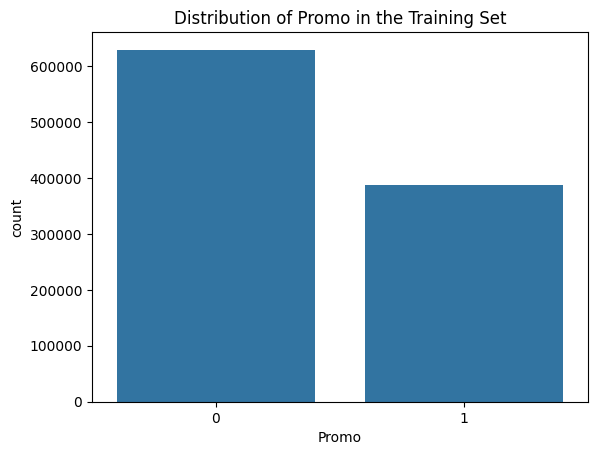

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Promo in the training dataset
sns.countplot(data=merged_df, x='Promo')
plt.title('Distribution of Promo in the Training Set')
plt.show()

# Log EDA step
logging.info('Analyzed and plotted the distribution of Promo in training set')


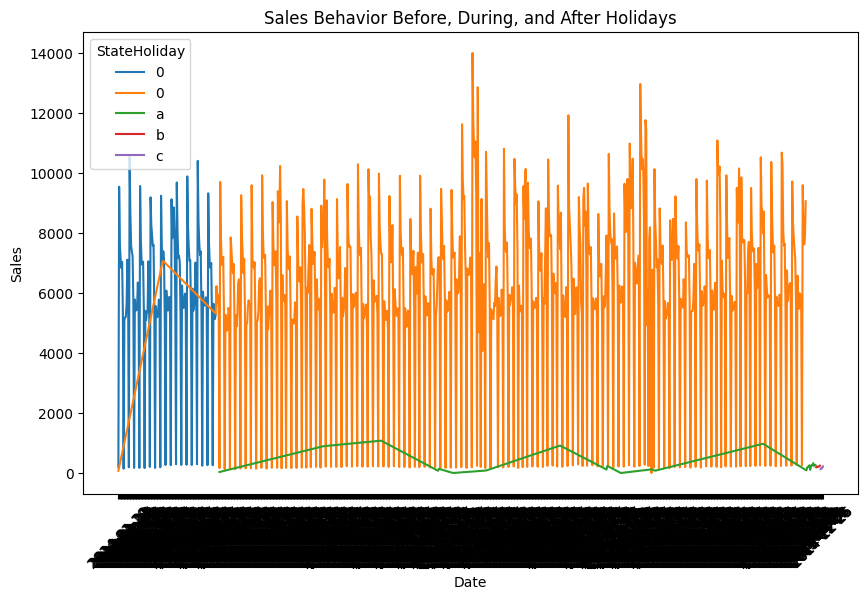

In [9]:
# Analyzing sales before, during, and after state holidays
holiday_sales = merged_df.groupby(['StateHoliday', 'Date'])['Sales'].mean().reset_index()

# Plotting sales around holidays
plt.figure(figsize=(10, 6))
sns.lineplot(data=holiday_sales, x='Date', y='Sales', hue='StateHoliday')
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.show()

# Log analysis
logging.info('Analyzed sales behavior around state holidays')


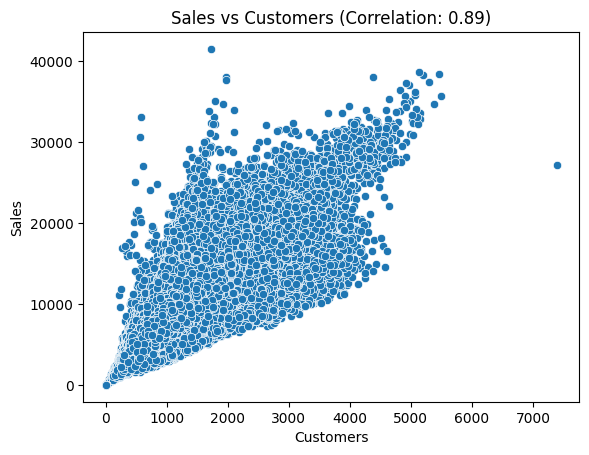

In [11]:
# Correlation between customers and sales
correlation = merged_df['Sales'].corr(merged_df['Customers'])

# Scatter plot to visualize the relationship
sns.scatterplot(data=merged_df, x='Customers', y='Sales')
plt.title(f'Sales vs Customers (Correlation: {correlation:.2f})')
plt.show()

# Log correlation result
logging.info(f'Correlation between Sales and Customers: {correlation}')


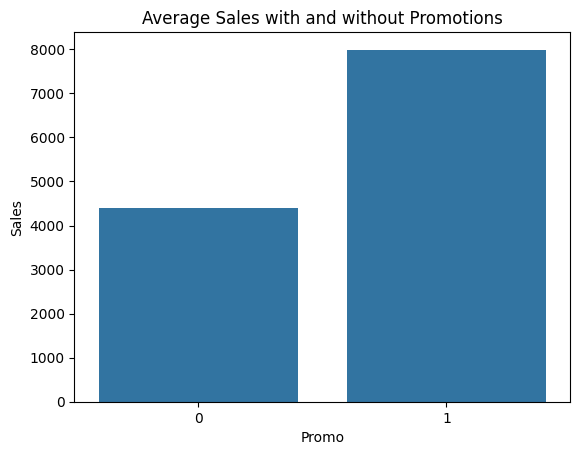

In [12]:
# Sales with and without promotions
promo_sales = merged_df.groupby('Promo')['Sales'].mean().reset_index()

# Bar plot of promo effect on sales
sns.barplot(data=promo_sales, x='Promo', y='Sales')
plt.title('Average Sales with and without Promotions')
plt.show()

# Log promo effect
logging.info('Analyzed the effect of promotions on sales')


In [13]:
logging.info('Exploratory data analysis completed')
